&emsp;Netflix users may have been made familiar of Channel 4's *The Great British Baking Show*, which frequently appears among the it's recommended shows regardless of the user's history with cooking shows. The program features the top amateur bakers in the UK placed in a series of challenges to determine who is the best baker. *Bake-Off* has recently seen a mixed critical reception, receiving criticism from The Salon's Melanie McFarland, citing that the latest series, "Felt like empty calories even though the components are more or less the same, save for a couple of ingredient swaps." (McFarland, 2020), as well as praise from digital media professional Scott Benson, explaining among a thread of more than 50 tweets that competitors, "Are baking things I can no longer comprehend."(Benson, 2017) Whether you love it or hate it, *Bake-Off* has made a big impression on the television industry. This makes prospect of being named a *Bake-off* champion an enticing one. However, as an American with very limited baking experience, it would be a challenging thing to accomplish. I would need an efficient way to adopt the characteristics of a champion British baker. It is my hope that with the power and versatility of data analytics, I will learn how to win *The Great British Bake-Off*. A unique aspect of this analysis is that any profitability from its findings would be very unlikely for either the show's company or any relevant shareholders. This makes myself and any other aspiring Bake-Off champions the sole stakeholders in this project, making it pretty simple to frame in this aspect. I am free to find any sort of data that will be useful in competition. All the data I need for this analysis should be relatively easily available as well. Data will primarily be found through scraping charts from the show's Wikipedia page, which contains each baker's age, occupation, hometown, and results for each week's competition, including which baker was a favorite, least favorite, star baker, and eliminated. This data source requires more work to get than a simple public database, but once that's done I believe a lot can be done with it. The other challenge presented by this problem is the limited volume and types of data. Instead of the large and diverse databases that many data analysis projects would provide, I have to predominantly rely on 11 seasons worth of competition results with some supplemental information about the competitors. Although it's not a huge amount of data, it should still be enough to determine what makes a great contender to win *Bake-Off*.

&emsp;The first step to creating any successful data-driven strategy is acquiring quality data. *Bake-off*'s Wikipedia page provides charts containing the results of each episode as well as information about the competitors, which should be all the information I need. (2020) By using the very useful BeautifulSoup module, I was able to scrape these tables into a data frame. The charts being color-coded instead of labeled created extra challenges, and there was a significant NaN-value problem, but once I managed to do remedy these issues I found the data to be quite useful. These charts contain information about the contestant's ages, hometowns, and results in each week's competition across 11 seasons. If I can find a pattern in either how successful contestants are or how contestants are selected for the show from these metrics, it could provide me a significant advantage.






###Season charts into Dataframes

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from numpy import percentile
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.image as fig
import seaborn as sns
from sklearn import tree
from sklearn import metrics

In [ ]:
# Season charts into databases

# probably could've used a for loop, but some of the charts were weird so it was much easier to do it one at a time

# Season charts into databases

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.image as fig
import seaborn as sns

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_1)'
page = requests.get(url)
soup = BeautifulSoup(page.content)
from geopy.geocoders import Nominatim
nom=Nominatim()

# season 1

for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

meaning_list = soup.find('b', text=re.compile('Colour key:')).find_all_next('dd', limit = 6)

color_list = []
meaning_text_list = []

for item in meaning_list:
    color_list.append(re.split('(?:background-color:)(\w*)',item.span.get('style'))[1])
    color_list = [color.lower() for color in color_list]
    meaning_text_list.append(re.split('(– )',item.text)[-1])

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s1elim = pd.DataFrame(row_list)
s1elim = s1elim.sort_values('Baker').reset_index(drop=True)
s1elim

table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s1=pd.read_html(str(indiatable))
# convert list to dataframe
s1bakers=pd.DataFrame(s1[0])
s1bakers=s1bakers.sort_values('Baker')
s1bakers

s1 = pd.concat([s1bakers, s1elim], axis=1)
s1.insert(10, '7', 'NaN')
s1.insert(11, '8', 'NaN')
s1.insert(12, '9', 'NaN')
s1.insert(13, '10', 'NaN')
s1 = s1[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s1.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s1 = s1.drop('otherBaker', axis = 1)
s1 = s1.set_index('Baker')

s1

# season 2

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_2)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker' })

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s2elim = pd.DataFrame(row_list)
s2elim = s2elim.sort_values('Baker').reset_index(drop=True)
# s2elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s2=pd.read_html(str(indiatable))
# convert list to dataframe
s2bakers=pd.DataFrame(s2[0])
s2bakers=s2bakers.sort_values('Baker')
# s2bakers

s2 = pd.concat([s2bakers, s2elim], axis=1)
s2.insert(12, '9', 'NaN')
s2.insert(13, '10', 'NaN')
s2 = s2.rename(columns={"7[1]": "7"})

s2 = s2[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s2.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s2 = s2.drop('otherBaker', axis = 1)
s2 = s2.set_index('Baker')

s2.at['Holly','8'] = 'runner_up'
s2.at['Janet','8'] = 'not_in_comp'

s2

# season 3

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_3)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker' })

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s3elim = pd.DataFrame(row_list)
s3elim = s3elim.sort_values('Baker').reset_index(drop=True)
# s3elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s3=pd.read_html(str(indiatable))
# convert list to dataframe
s3bakers=pd.DataFrame(s3[0])
s3bakers=s3bakers.sort_values('Baker')
# s3bakers


s3 = pd.concat([s3bakers, s3elim], axis=1)
s3 = s3.rename(columns={"6[1]": "6"})
s3 = s3[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]

s3.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s3 = s3.drop('otherBaker', axis = 1)
s3 = s3.set_index('Baker')

s3.at['Brendan','7'] = 'fav'
s3.at['Brendan','8'] = 'next_round'
s3.at['Brendan','9'] = 'fav'
s3.at['Brendan','10'] = 'runner_up'
s3.at['Danny','9'] = 'eliminated'
s3.at['Danny','10'] = 'not_in_comp'
s3.at['James','10'] = 'runner_up'
s3.at['John','10'] = 'winner'


s3

#season 4

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_4)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker' })

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s4elim = pd.DataFrame(row_list)
s4elim = s4elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s4=pd.read_html(str(indiatable))
# convert list to dataframe
s4bakers=pd.DataFrame(s4[0])
s4bakers=s4bakers.sort_values('Baker')
# s4bakers

s4 = pd.concat([s4bakers, s4elim], axis=1)

# s4 = s4.rename(columns={"7[1]": "7"})

s4 = s4[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s4.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s4 = s4.drop('otherBaker', axis = 1)
s4 = s4.set_index('Baker')

s4.at['Christine','8'] = 'eliminated'
s4.at['Christine','9'] = 'not_in_comp'
s4.at['Christine','10'] = 'not_in_comp'
s4.at['Frances','8'] = 'least_fav'
s4.at['Frances','9'] = 'fav'
s4.at['Frances','10'] = 'winner'
s4.at['Kimberley','8'] = 'fav'
s4.at['Kimberley','9'] = 'star_baker'
s4.at['Kimberley','10'] = 'runner_up'
s4.at['Ruby','8'] = 'star_baker'
s4.at['Ruby','9'] = 'least_fav'
s4.at['Ruby','10'] = 'runner_up'
s4.at['Beca','10'] = 'not_in_comp'

s4

#season 5

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_5)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker','chocolate':'withdrew'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s5elim = pd.DataFrame(row_list)
s5elim = s5elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s5=pd.read_html(str(indiatable))
# convert list to dataframe
s5bakers=pd.DataFrame(s5[0])

# s4bakers

s5 = pd.concat([s5bakers, s5elim], axis=1)
s5 = s5.rename(columns={"Baker[3]": "Baker"})
s5 = s5.rename(columns={"5[a]":"5"})
s5 = s5.rename(columns={"6[b]": "6"})
s5 = s5[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s5.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s5 = s5.drop('otherBaker', axis = 1)
s5 = s5.set_index('Baker')
# s5bakers=s5bakers.sort_values('Baker')

s5.at['Luis','7'] = 'next_round'
s5.at['Luis','8'] = 'fav'
s5.at['Luis','9'] = 'fav'
s5.at['Luis','10'] = 'runner_up'
s5.at['Martha','9'] = 'not_in_comp'
s5.at['Martha','10'] = 'not_in_comp'
s5.at['Richard','10'] = 'runner_up'

s5

#season 6

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_6)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker','chocolate':'withdrew','darkgrey':'not_in_comp'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s6elim = pd.DataFrame(row_list)
s6elim = s6elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s6=pd.read_html(str(indiatable))
# convert list to dataframe
s6bakers=pd.DataFrame(s6[0])

# s4bakers

s6 = pd.concat([s6bakers, s6elim], axis=1)
s6 = s6.rename(columns={"Baker[4]": "Baker"})
s6 = s6[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s6.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s6 = s6.drop('otherBaker', axis = 1)
s6 = s6.set_index('Baker')

s6.at['Mat','8'] = 'not_in_comp'
s6.at['Mat','9'] = 'not_in_comp'
s6.at['Mat','10'] = 'not_in_comp'
s6.at['Nadiya','8'] = 'star_baker'
s6.at['Nadiya','9'] = 'star_baker'
s6.at['Nadiya','10'] = 'winner'
s6.at['Mat','8'] = 'not_in_comp'
s6.at['Mat','9'] = 'not_in_comp'
s6.at['Mat','10'] = 'not_in_comp'
s6.at['Paul','7'] = 'least_fav'
s6.at['Paul','8'] = 'eliminated'
s6.at['Paul','9'] = 'not_in_comp'
s6.at['Paul','10'] = 'not_in_comp'
s6.at['Tamal','10'] = 'runner_up'
s6.at['Flora','9'] = 'eliminated'
s6.at['Flora','10'] = 'not_in_comp'
s6.at['Ian','10'] = 'runner_up'

s6

# season 7 wasn't working right for some reason

s7 = pd.DataFrame(np.array([['Andrew', 25, 'Aerospace engineer', 'Holywood, Dounty Down', 'next_round', 'fav', 'fav', 'fav', 'next_round', 'least_fav', 'star_baker', 'next_round', 'star_baker', 'runner_up'],['Benjamina',23, 'Teaching assistant', 'South London', 'fav','next_round','next_round','star_baker','next_round','next_round','fav','eliminated','not_in_comp','not_in_comp'],['Candice',31,'PE teacher','Barton-Le-Clay, Bedfordshire','least_fav','star_baker','least_fav','next_round','star_baker','fav','next_round','star_baker','fav','winner'],['Jane',61,'Garden designer','Beckenham','star_baker','next_round','next_round','next_round','fav','next_round','next_round','fav','least_fav','runner_up'],['Kate',37,'Nurse','Brooke, Norfolk','next_round','next_round','fav','eliminated','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp'],['Lee',67,'Pastor','Bolton','eliminated','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp'],['Louise',46,'Hairdresser','Cardiff','next_round','eliminated','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp'],['Michael',20,'Student','Durham','next_round','next_round','eliminated','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp'],['Rav',28,'Student support','Erith','next_round','next_round','next_round','least_fav','next_round','eliminated','not_in_comp','not_in_comp','not_in_comp','not_in_comp'],['Selasi',30,'Client service associate','London','fav','next_round','next_round','next_round','next_round','fav','least_fav','least_fav','eliminated','not_in_comp'],['Tom',26,'Project engagement engineer','Rochdale','next_round','next_round','star_baker','least_fav','least_fav','star_baker','eliminated','not_in_comp','not_in_comp','not_in_comp'],['Val',66,'Semi-retired, Substitute teacher','Yeovil','least_fav','least_fav','least_fav','next_round','eliminated','not_in_comp','not_in_comp','not_in_comp','not_in_comp','not_in_comp']]), columns =['Baker', 'Age', 'Occupation', 'Hometown', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
s7 = s7.set_index('Baker')

# season 8

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_8)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker','chocolate':'withdrew','darkgrey':'not_in_comp'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s8elim = pd.DataFrame(row_list)
s8elim = s8elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s8=pd.read_html(str(indiatable))
# convert list to dataframe
s8bakers=pd.DataFrame(s8[0])

s8 = pd.concat([s8bakers, s8elim], axis=1)
s8 = s8.rename(columns={"Baker[5][6]": "Baker"})
s8 = s8[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
# s8.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
# s8 = s8.drop('otherBaker', axis = 1)

s8.at[0,'Baker'] = 'Chris'
s8.at[1,'Baker'] = 'Flo'
s8.at[2,'Baker'] = 'James'
s8.at[3,'Baker'] = 'Julia'
s8.at[4,'Baker'] = 'Kate'
s8.at[5,'Baker'] = 'Liam'
s8.at[6,'Baker'] = 'Peter'
s8.at[7,'Baker'] = 'Sophie'
s8.at[8,'Baker'] = 'Stacey'
s8.at[9,'Baker'] = 'Steven'
s8.at[10,'Baker'] = 'Tom'
s8.at[11,'Baker'] = 'Yan'

s8 = s8.set_index('Baker')

s8.at['Kate','9'] = 'fav'
s8.at['Kate','10'] = 'runner_up'
s8.at['Liam','7'] = 'fav'
s8.at['Liam','8'] = 'eliminated'
s8.at['Liam','9'] = 'not_in_comp'
s8.at['Liam','10'] = 'not_in_comp'
s8.at['Sophie','10'] = 'winner'
s8.at['Stacey','10'] = 'not_in_comp'
s8.at['Steven','10'] = 'runner_up'

s8

# season 9

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_9)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker','chocolate':'withdrew','darkgrey':'not_in_comp','gainsboro':'gainsboro'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s9elim = pd.DataFrame(row_list)
s9elim = s9elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s9=pd.read_html(str(indiatable))
# convert list to dataframe
s9bakers=pd.DataFrame(s9[0])

s9 = pd.concat([s9bakers, s9elim], axis=1)
s9 = s9.rename(columns={"Baker [1]":"Baker"})
s9 = s9[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s9.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s9 = s9.drop('otherBaker', axis = 1)

s9.at[0,'Baker'] = 'Anthony'
s9.at[1,'Baker'] = 'Briony'
s9.at[2,'Baker'] = 'Dan'
s9.at[3,'Baker'] = 'Imelda'
s9.at[4,'Baker'] = 'Jon'
s9.at[5,'Baker'] = 'Karen'
s9.at[6,'Baker'] = 'Kim-Joy'
s9.at[7,'Baker'] = 'Luke'
s9.at[8,'Baker'] = 'Manon'
s9.at[9,'Baker'] = 'Rahul'
s9.at[10,'Baker'] = 'Ruby'
s9.at[11,'Baker'] = 'Tery'

s9 = s9.set_index('Baker')

s9.at['Briony','10'] = 'not_in_comp'
s9.at['Jon','7'] = 'eliminated'
s9.at['Jon','8'] = 'not_in_comp'
s9.at['Jon','9'] = 'not_in_comp'
s9.at['Jon','10'] = 'not_in_comp'
s9.at['Kim-Joy','10'] = 'runner_up'

s9

# season 10

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_10)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker','chocolate':'withdrew','darkgrey':'not_in_comp','gainsboro':'gainsboro'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s10elim = pd.DataFrame(row_list)
s10elim = s10elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s10=pd.read_html(str(indiatable))
# convert list to dataframe
s10bakers=pd.DataFrame(s10[0])

s10 = pd.concat([s10bakers, s10elim], axis=1)

s10 = s10[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
s10.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
s10 = s10.drop('otherBaker', axis = 1)

s10.at[0,'Baker'] = 'Alice'
s10.at[1,'Baker'] = 'Amelia'
s10.at[2,'Baker'] = 'Dan'
s10.at[3,'Baker'] = 'David'
s10.at[4,'Baker'] = 'Helena'
s10.at[5,'Baker'] = 'Henry'
s10.at[6,'Baker'] = 'Jamie'
s10.at[7,'Baker'] = 'Michael'
s10.at[8,'Baker'] = 'Michelle'
s10.at[9,'Baker'] = 'Phil'
s10.at[10,'Baker'] = 'Priya'
s10.at[11,'Baker'] = 'Rosie'
s10.at[12,'Baker'] = 'Steph'

s10 = s10.set_index('Baker')

s10.at['Alice','9'] = 'star_baker'
s10.at['Alice','10'] = 'runner_up'
s10.at['David','9'] = 'least_fav'
s10.at['David','10'] = 'winner'
s10.at['Henry','8'] = 'eliminated'
s10.at['Henry','9'] = 'not_in_comp'
s10.at['Henry','10'] = 'not_in_comp'
s10.at['Michael','8'] = 'not_in_comp'
s10.at['Michael','9'] = 'not_in_comp'
s10.at['Michael','10'] = 'not_in_comp'
s10.at['Alice','9'] = 'star_baker'
s10.at['Steph','9'] = 'fav'
s10.at['Steph','10'] = 'runner_up'

s10

# season 11

url = 'https://en.wikipedia.org/wiki/The_Great_British_Bake_Off_(series_11)'
page = requests.get(url)
soup = BeautifulSoup(page.content)


for t in soup.find_all("table"):
    if "Elimination chart" in t.th.text:
        elim_chart = t

header_list = []
for head in elim_chart.findAll('th'):
    if head.text.startswith('Elim') is False:
        header_list.append(head.text.rstrip())

full_text_meaning_dict = dict(zip(color_list, meaning_text_list))

full_text_meaning_dict

meaning_dict = dict({'lightblue': 'next_round', 'orangered': 'eliminated', 'plum': 'least_fav', 'cornflowerblue': 'fav', 'limegreen': 'runner_up', 'yellow': 'winner', 'silver':'not_in_comp', 'lemonchiffon':'star_baker','chocolate':'withdrew','darkgrey':'not_in_comp','gainsboro':'gainsboro'})

row_list = []

for name in elim_chart.findAll('td', align = 'left'):
    row = [name.text]
    tag_list = name.find_next_siblings(limit = 6)

    for item in tag_list:

        color = item.get('style')
        col = 1

        if item.has_attr('colspan'):
            col = int(item.get('colspan'))

        row.extend([meaning_dict[x.lower()] for x in
        re.split("(?:background:\s?)(\w*)(?:;)”?", color)
        if x] * col)

    row_list.append(dict(zip(header_list,row)))

s11elim = pd.DataFrame(row_list)
s11elim = s11elim.sort_values('Baker').reset_index(drop=True)
# s4elim


table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
# print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

s11=pd.read_html(str(indiatable))
# convert list to dataframe
s11bakers=pd.DataFrame(s11[0])

s11 = pd.concat([s11bakers, s11elim], axis=1)

s11 = s11[['Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']]
# s11.columns = ['otherBaker', 'Baker','Age','Occupation','Hometown','1','2','3','4','5','6','7','8','9','10']
# s11 = s11.drop('otherBaker', axis = 1)

s11.at[0,'Baker'] = 'Dave'
s11.at[1,'Baker'] = 'Hermine'
s11.at[2,'Baker'] = 'Laura'
s11.at[3,'Baker'] = 'Linda'
s11.at[4,'Baker'] = 'Loriea'
s11.at[5,'Baker'] = 'Lottie'
s11.at[6,'Baker'] = 'Mak'
s11.at[7,'Baker'] = 'Marc'
s11.at[8,'Baker'] = 'Mark'
s11.at[9,'Baker'] = 'Peter'
s11.at[10,'Baker'] = 'Rowan'
s11.at[11,'Baker'] = 'Sura'

s11 = s11.set_index('Baker')

s11.at['Dave','9'] = 'fav'
s11.at['Dave','10'] = 'runner_up'
s11.at['Hermine','10'] = 'not_in_comp'
s11.at['Marc','8'] = 'eliminated'
s11.at['Marc','9'] = 'not_in_comp'
s11.at['Marc','10'] = 'not_in_comp'
s11.at['Mark','7'] = 'not_in_comp'
s11.at['Mark','8'] = 'not_in_comp'
s11.at['Mark','9'] = 'not_in_comp'
s11.at['Mark','10'] = 'not_in_comp'
s11.at['Peter','9'] = 'star_baker'
s11.at['Peter','10'] = 'winner'


s11

alls = pd.concat([s1, s2, s3, s4, s5, s6, s8, s9, s10, s11])
finalists = pd.concat([s1, s2, s3, s4, s5, s6, s8, s9, s10, s11])

alls.head()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,Age,Occupation,Hometown,1,2,3,4,5,6,7,8,9,10
Baker,,,,,,,,,,,,,
Annetha,30,Midwife,Essex,fav,eliminated,not_in_comp,not_in_comp,not_in_comp,not_in_comp,NaN,NaN,NaN,NaN
David,31,Entrepreneur,Milton Keynes,least_fav,least_fav,least_fav,eliminated,not_in_comp,not_in_comp,NaN,NaN,NaN,NaN
Edd,24,Debt collector for Yorkshire Bank,Bradford,next_round,fav,fav,least_fav,fav,winner,NaN,NaN,NaN,NaN
Jasminder,45,Assistant Credit Control Manager,Birmingham,next_round,next_round,least_fav,fav,eliminated,not_in_comp,NaN,NaN,NaN,NaN
Jonathan,25,Research Analyst,St Albans,next_round,fav,eliminated,not_in_comp,not_in_comp,not_in_comp,NaN,NaN,NaN,NaN


In [ ]:
# database of only finalists

index_names = finalists[finalists['6'] == 'not_in_comp'].index
finalists.drop(index_names, inplace = True)
index_names = finalists[finalists['6'] == 'eliminated'].index
finalists.drop(index_names, inplace = True)
index_names = finalists[finalists['8'] == 'not_in_comp'].index
finalists.drop(index_names, inplace = True)
index_names = finalists[finalists['8'] == 'eliminated'].index
finalists.drop(index_names, inplace = True)
index_names = finalists[finalists['10'] == 'not_in_comp'].index
finalists.drop(index_names, inplace = True)
index_names = finalists[finalists['10'] == 'eliminated'].index
finalists.drop(index_names, inplace = True)

finalists.head()

,Age,Occupation,Hometown,1,2,3,4,5,6,7,8,9,10
Baker,,,,,,,,,,,,,
Edd,24,Debt collector for Yorkshire Bank,Bradford,next_round,fav,fav,least_fav,fav,winner,NaN,NaN,NaN,NaN
Ruth,31,Retail manager/Housewife,"Poynton, Cheshire",fav,next_round,fav,fav,fav,runner_up,NaN,NaN,NaN,NaN
Holly,31,Advertising executive,Leicester,star_baker,next_round,next_round,star_baker,next_round,least_fav,fav,runner_up,NaN,NaN
Jo,41,Housewife,"Ongar, Essex",fav,least_fav,next_round,next_round,next_round,star_baker,fav,winner,NaN,NaN
Mary-Anne,45,Housewife,"Kidderminster, Worcestershire",next_round,next_round,fav,fav,fav,fav,least_fav,runner_up,NaN,NaN


#Exploring Contestant Qualities

###Age

In [ ]:
# 5 number summary

print('Min: %.3f' % alls['Age'].min())
print('1st Quartile %.3f' % percentile(alls['Age'], 25))
print('Median: %.3f' % percentile(alls['Age'], 50))
print('3rd Quartile: %.3f' % percentile(alls['Age'], 75))
print('Max: %.3f' % alls['Age'].max())

Min: 17.000
1st Quartile 29.000
Median: 34.000
3rd Quartile: 45.000
Max: 71.000


((array([11., 12., 36., 16., 12., 10., 10.,  5.,  3.,  5.]),
  array([17. , 22.4, 27.8, 33.2, 38.6, 44. , 49.4, 54.8, 60.2, 65.6, 71. ]),
  <a list of 10 Patch objects>),
 (array([ 3.,  3., 10.,  2.,  2.,  2.,  0.,  0.,  0.,  2.]),
  array([20. , 24.3, 28.6, 32.9, 37.2, 41.5, 45.8, 50.1, 54.4, 58.7, 63. ]),
  <a list of 10 Patch objects>))

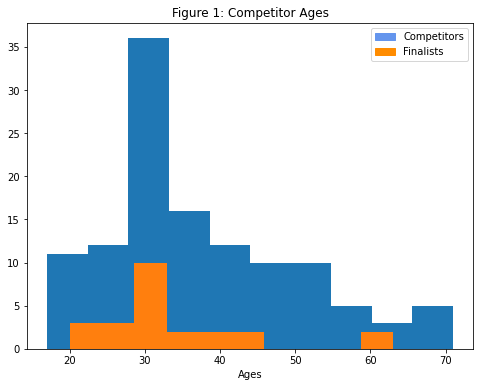

In [ ]:
# Age histogram

import matplotlib.patches as mpatches
plt.figure(figsize = (8,6))
age = plt.hist(alls['Age'])
finalistage = plt.hist(finalists['Age'])


lblue = mpatches.Patch(color='cornflowerblue', label='Competitors')
lorange = mpatches.Patch(color='darkorange', label='Finalists')
plt.legend(handles=[lblue,lorange])
plt.xlabel('Ages')
plt.title('Figure 1: Competitor Ages')
age, finalistage

&emsp;Shown above in figure 1 is a histogram of the contestant's ages throughout the whole series, as well as the ages of those competitors who made the final 3. Although the graph shows a distribution of contestants across all ages, there is a very clear trend for which ages tend to be selected for participation in the show. It appears as though bakers in their early 30s, specifically close to the median age of 34, are selected more often than those of other ages, giving me a small window before the optimal time for me to try to appear on the show. An interesting observation about this graph is that other than the large spike near the median, the graph's right-skewedness is relatively minimal. This implies that the age bias is towards a very specific age range, rather than towards younger bakers in general. This doesn't necessarily mean the *Bake-off* staff is specifically targeting 30-year-olds in the hopes of better television, as it could also possibly be a result of a greater tendency for this demographic to apply for the series, a sort of baking boom causing more people in this range to try baking, or simply a result of not enough data. That being said, the optimal time to attempt to compete on *The Great British Baking Show* is most likely to be when I am in my early 30's, giving me somewhere around 8-10 years to become a master baker.

<BarContainer object of 11 artists>

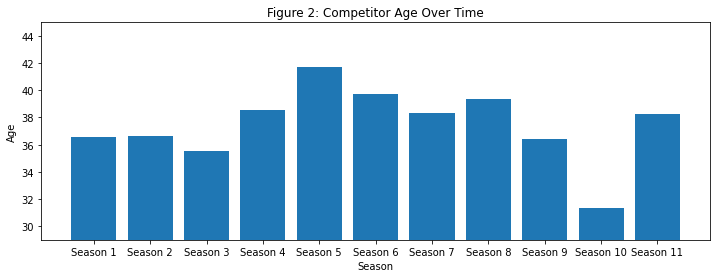

In [ ]:
seasons = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11]
seasonsfull = ['Season 1' ,'Season 2' ,'Season 3' ,'Season 4' ,'Season 5' ,'Season 6' ,'Season 7' ,'Season 8' ,'Season 9' ,'Season 10' ,'Season 11']

# age per season histogram
agetime = []
for s in seasons:
  agetime.append((s['Age'].astype(int)).mean())

plt.figure(figsize=(12,4))
plt.title('Figure 2: Competitor Age Over Time')
plt.ylabel('Age')
plt.xlabel('Season')
plt.ylim((29,45))

plt.bar(seasonsfull, agetime)

&emsp;Shown in figure 2 is a bar chart of contestant's average age per season. There doesn't seem to be any trend in ages as seasons pass. However, the graph is surprisingly varied, as it gets relatively close at times to the edges of the graph, which represent the first and third quartiles of the age range. This demonstrates that the recruitment process likely doesn't pay an enormous amount of attention to the age range of a specific season, meaning a baker's chances of getting in aren't substantially impacted if other applicants around the same age as them are especially talented that year. This means that even though age could be a minor factor, I will likely not be trying to implement a way to track applicant ages into my strategy.

##Hometown

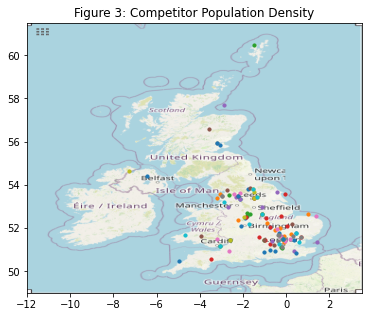

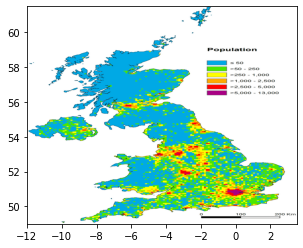

In [ ]:
# couldn't figure out how to save the images permanently, I hope having them on the original paper is enough

# img = plt.imread('ukbackgroundmap.png')
# ukimg = plt.imread('ukpopdensity.ppm')

# apply geocode to hometowns
s1geos = s1['Hometown'].apply(nom.geocode).apply(pd.Series)
s1geo = s1geos[1].apply(pd.Series)
s2geos = s2['Hometown'].apply(nom.geocode).apply(pd.Series)
s2geo = s2geos[1].apply(pd.Series)
s3geos = s3['Hometown'].apply(nom.geocode).apply(pd.Series)
s3geo = s3geos[1].apply(pd.Series)
s4geos = s4['Hometown'].apply(nom.geocode).apply(pd.Series)
s4geo = s4geos[1].apply(pd.Series)
s5geos = s5['Hometown'].apply(nom.geocode).apply(pd.Series)
s5geo = s5geos[1].apply(pd.Series)
s6geos = s6['Hometown'].apply(nom.geocode).apply(pd.Series)
s6geo = s6geos[1].apply(pd.Series)
s7geos = s7['Hometown'].apply(nom.geocode).apply(pd.Series)
s7geo = s7geos[1].apply(pd.Series)
s8geos = s8['Hometown'].apply(nom.geocode).apply(pd.Series)
s8geo = s8geos[1].apply(pd.Series)
s9geos = s9['Hometown'].apply(nom.geocode).apply(pd.Series)
s9geo = s9geos[1].apply(pd.Series)
s10geos = s10['Hometown'].apply(nom.geocode).apply(pd.Series)
s10geo = s10geos[1].apply(pd.Series)
s11geos = s11['Hometown'].apply(nom.geocode).apply(pd.Series)
s11geo = s11geos[1].apply(pd.Series)

# scatterplot on top of background image

bakerscatter = fig, ax = plt.subplots()

ax.scatter(s1geo[1], s1geo[0], s=10)
ax.scatter(s2geo[1], s2geo[0], s=10)
ax.scatter(s3geo[1], s3geo[0], s=10)
ax.scatter(s4geo[1], s4geo[0], s=10)
ax.scatter(s5geo[1], s5geo[0], s=10)
ax.scatter(s6geo[1], s6geo[0], s=10)
ax.scatter(s7geo[1], s7geo[0], s=10)
ax.scatter(s8geo[1], s8geo[0], s=10)
ax.scatter(s9geo[1], s9geo[0], s=10)
ax.scatter(s10geo[1], s10geo[0], s=10)
ax.scatter(s11geo[1], s11geo[0], s=10)

ax.set_xlim(-12, 3.5)
ax.set_ylim(49,61.5)

ax.imshow(img, extent = (-12,3.5,49,61.5), aspect= 'equal')
ax.figure.set_size_inches(6,6,5)
plt.title('Figure 3: Competitor Population Density')

ukscatter = fig, ax = plt.subplots()
ax.imshow(ukimg, extent = (-12,3.5,49,61.5), aspect= 'equal')

&emsp;Figure 3 is a population density graph of the contestants featured on the show, next to a population density graph of the entire UK, coutesy of researchgate.com (Vieno, 2015). Although the graph does correlate with the population graph, it appears to be more spread out than I would expect. This implies that maintaining a variety of hometown locations is at least somewhat of a priority to the *Bake-Off* staff. It is difficult to prove this concretely without importing entire UK population into pandas, but I believe it is enough to base some level of decision making off of. Another observation the chart presents is the spread within seasons. With a few exceptions, contestents tend to be separated from other contestents from their season. This means that unless there are two very strong contestants from the same area, an effort is made to pick contestants from different places. It is likely that this is the reason the whole graph is more spread as well. This is key information which I will keep in mind when I move to the UK in order to compete. My odds are best if I find a low population city in the UK where there are no good bakers to live in until I win *Bake-Off*.

#Predicting Winners

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

alltrain = pd.concat([s3, s4, s5, s6, s7, s8])
alltest = pd.concat([s9, s10, s11])

X_traind = alltrain[['1','2','3','4','5','6','7','8','9']]
Y_traind = alltrain[['10']]
X_testd = alltest[['1','2','3','4','5','6','7','8','9']]
Y_testd = alltest[['10']]

enc.fit(X_traind)
X_train = enc.transform(X_traind).toarray()
enc.fit(Y_traind)
Y_train = enc.transform(Y_traind).toarray()
enc.fit(X_testd)
X_test = enc.transform(X_testd).toarray()
enc.fit(Y_traind)
Y_test = enc.transform(Y_testd).toarray()

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

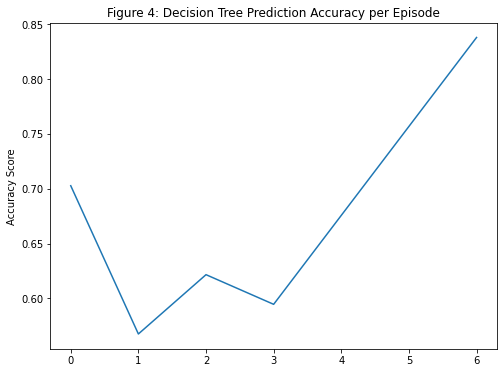

In [ ]:
X_traind1 = alltrain[['1']]
X_testd1 = alltest[['1']]
Y_traind = alltrain[['10']]
Y_testd = alltest[['10']]

scores = []

# 1
enc.fit(X_traind1)
X_train1 = enc.transform(X_traind1).toarray()
enc.fit(X_testd1)
X_test1 = enc.transform(X_testd1).toarray()
enc.fit(Y_traind)
Y_train = enc.transform(Y_traind).toarray()
enc.fit(Y_testd)
Y_test = enc.transform(Y_testd).toarray()

clf1 = clf.fit(X_train1, Y_train)
Y_pred = clf.predict(X_test1)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

#2
X_traind2 = alltrain[['1','2']]
X_testd2 = alltest[['1','2']]

enc.fit(X_traind2)
X_train2 = enc.transform(X_traind2).toarray()
enc.fit(X_testd2)
X_test2 = enc.transform(X_testd2).toarray()

clf = clf.fit(X_train2, Y_train)
Y_pred = clf.predict(X_test2)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

#3
X_traind3 = alltrain[['1','2','3']]
X_testd3 = alltest[['1','2','3']]

enc.fit(X_traind3)
X_train3 = enc.transform(X_traind3).toarray()
enc.fit(X_testd3)
X_test3 = enc.transform(X_testd3).toarray()

clf = clf.fit(X_train3, Y_train)
Y_pred = clf.predict(X_test3)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

# 4 and 5 don't work

# 6
X_traind6 = alltrain[['1','2','3','6']]
X_testd6 = alltest[['1','2','3','6']]

enc.fit(X_traind6)
X_train6 = enc.transform(X_traind6).toarray()
enc.fit(X_testd6)
X_test6 = enc.transform(X_testd6).toarray()

clf = clf.fit(X_train6, Y_train)
Y_pred = clf.predict(X_test6)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

# 7
X_traind7 = alltrain[['1','2','3','6','7']]
X_testd7 = alltest[['1','2','3','6','7']]

enc.fit(X_traind7)
X_train7 = enc.transform(X_traind7).toarray()
enc.fit(X_testd7)
X_test7 = enc.transform(X_testd7).toarray()

clf = clf.fit(X_train7, Y_train)
Y_pred = clf.predict(X_test7)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

# 8
X_traind8 = alltrain[['1','2','3','6','7','8']]
X_testd8 = alltest[['1','2','3','6','7','8']]

enc.fit(X_traind8)
X_train8 = enc.transform(X_traind8).toarray()
enc.fit(X_testd8)
X_test8 = enc.transform(X_testd8).toarray()

clf = clf.fit(X_train8, Y_train)
Y_pred = clf.predict(X_test8)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

# 9
X_traind9 = alltrain[['1','2','3','6','7','8','9']]
X_testd9 = alltest[['1','2','3','6','7','8','9']]

enc.fit(X_traind9)
X_train9 = enc.transform(X_traind9).toarray()
enc.fit(X_testd9)
X_test9 = enc.transform(X_testd9).toarray()

clf = clf.fit(X_train9, Y_train)
Y_pred = clf.predict(X_test9)

scores.append(metrics.accuracy_score(Y_test, Y_pred))

# plot
plt.figure(figsize=(8,6))
plt.title('Figure 4: Decision Tree Prediction Accuracy per Episode')
plt.ylabel('Accuracy Score')
plt.plot(scores)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Metrics Accuracy Score:", metrics.accuracy_score(Y_test, Y_pred), )

Metrics Accuracy Score: 0.918918918918919


&emsp;The best possible way to discover how to win bake off once I had made it on the show is to use machine learning to predict winners from the results of the episodes. If I can confirm that it is possible to predict the winner, then I know to look for a strategy to follow in this prediction. I used sklearn's decision tree machine learning class, which was able to predict the winner from the first 9 episodes with a 91.89% success rate. This is a surprisingly high accuracy rating, which could be for a few reasons. The rating is based on the algorithm's ability to predict results from every competitor after most have been eliminated, meaning it predicts who is no longer in the competition as well. Unfortunately, testing specifically for winners is beyond the scope of my abilities in decision tree models. I still believe it's a significant finding, though, and I think it's worth looking into how results from earlier on in the competition correspond to a competitor's likelihood of winning. The obvious answer would be that more successful results means more success in the finals, but this isn't guaranteed to be the answer. It's possible that those who earn Star Baker early in the competition are taking too many risks too early, which could lead to an early elimination. Consistency is a key component of a successful baker in *Bake-Off*, because one mistake is all it takes to be sent home early. Until the finals, you don't have to be the best baker of the week, just not the worst.

&emsp;Figure 4 plots the accuracy rating's success every season, which might show how early any patterns in the data present themselves. These results also point out the problem with using too small of a data set, as the strong first round result was likely a fluke, which raises questions about the validity of the rest of the results. Regardless, we can note that the early rounds don't have very much of a weight on the final results. This means I don't need to be worried if my early results aren't as good as I would like them to be. Although I am a little disapointed in my own ability to conduct a proper analysis and would rather not settle for an algorithm that's really good at guessing that people who are eliminated are still eliminated, there are still some valuable insights gained from it.

#Round Statistics

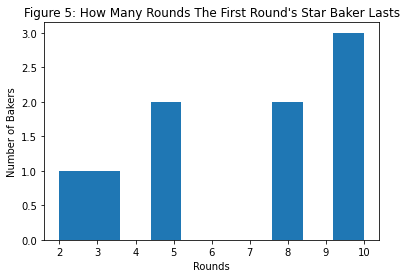

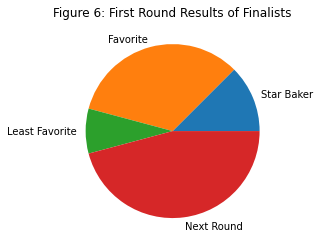

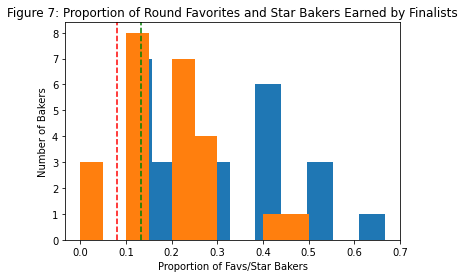

In [ ]:
# find relevant ratios and counts
alls['starcount'] = (alls[['1','2','3','4','5','6','7','8','9','10']]=='star_baker').sum(axis=1)
alls['favcount'] = (alls[['1','2','3','4','5','6','7','8','9','10']]=='fav').sum(axis=1)
alls['leastfavcount'] = (alls[['1','2','3','4','5','6','7','8','9','10']]=='least_fav').sum(axis=1)
alls['roundsmade'] = (alls[['1','2','3','4','5','6','7','8','9','10']]!='not_in_comp').sum(axis=1) - (alls[['1','2','3','4','5','6','7','8','9','10']]=='NaN').sum(axis=1)
alls['favratio'] = alls['favcount']/alls['roundsmade']
alls['leastfavratio'] = alls['leastfavcount']/alls['roundsmade']
alls['starratio'] = alls['starcount']/alls['roundsmade']
finalists['starcount'] = (finalists[['1','2','3','4','5','6','7','8','9','10']]=='star_baker').sum(axis=1)
finalists['favcount'] = (finalists[['1','2','3','4','5','6','7','8','9','10']]=='fav').sum(axis=1)
finalists['leastfavcount'] = (finalists[['1','2','3','4','5','6','7','8','9','10']]=='least_fav').sum(axis=1)
finalists['roundsmade'] = (finalists[['1','2','3','4','5','6','7','8','9','10']]!='not_in_comp').sum(axis=1) - (finalists[['1','2','3','4','5','6','7','8','9','10']]=='NaN').sum(axis=1)
finalists['favratio'] = finalists['favcount']/finalists['roundsmade']
finalists['leastfavratio'] = finalists['leastfavcount']/finalists['roundsmade']
finalists['starratio'] = finalists['starcount']/finalists['roundsmade']

#pie chart prep
starpie = ((finalists[['1']]=='star_baker').sum(axis=1)).sum()
favpie = ((finalists[['1']]=='fav').sum(axis=1)).sum()
leastfavpie = ((finalists[['1']]=='least_fav').sum(axis=1)).sum()
nextroundpie = ((finalists[['1']]=='next_round').sum(axis=1)).sum()
finalistpie = pd.DataFrame(columns=[starpie, favpie, leastfavpie, nextroundpie])
finalistpie = pd.DataFrame(np.array([['Star Baker', starpie],['Favorite', favpie], ['Least Favorite', leastfavpie], ['Next Round', nextroundpie]]))

# first round star bakers
plt.figure()
plt.title('Figure 5: How Many Rounds The First Round\'s Star Baker Lasts')
plt.xlabel('Rounds')
plt.ylabel('Number of Bakers')
plt.hist(alls['roundsmade'].loc[alls['1'] == 'star_baker'])

#finalist first rounds
plt.figure()
plt.title('Figure 6: First Round Results of Finalists')
plt.pie(finalistpie[1], labels=finalistpie[0])

# finalist result ratios
plt.figure()
plt.title('Figure 7: Proportion of Round Favorites and Star Bakers Earned by Finalists')
plt.hist(finalists['favratio'])
plt.hist(finalists['starratio'])
plt.xlabel('Proportion of Favs/Star Bakers')
plt.ylabel('Number of Bakers')
plt.axvline(alls['favratio'].sum() / len(alls['favratio']), c='g', ls='--')
plt.axvline(alls['starratio'].sum() / len(alls['starratio']), c='r', ls='--')



&emsp;Above are some statistics on the success of the competition's finalists during earlier rounds. Especially since the algorithm suggested the first round serves as at least some indication of a contestant's success in the competition, I am curious as to how well finalists tend to do in the first round. Figure 5 shows that while those who achieve star baker in the first round tend to do very well, this is not always the case. Some first round star bakers even got eliminated the very next round. Figure 6 tells a similar story, showing strong first round results for eventual finalists in general, but not every time. This says to me that it's always good to do well early, but anything can happen on *Bake-Off*. Figure 7 shows how many favorites and star bakers were earned by contestants who would go on to the finals. Since there is some variance to the number of contestants and episodes each season, and the first season didn't include a Star Baker, averages to compare the results to will be a little unreliable, but it is still clear that better performance in the competitions are an indicator that a competitor is more likely to make the finals. In fact, the only competitors who performed below average were those who were from season 1, when star baker hadn't been introduced to the competition. These graphs are likely enough to disprove my theory that consistency is more important than being a strong favorite in an individual week. It would have been an interesting result if winners didn't win much more often than average, but performing well requires being a strong baker, and being a strong baker means winning more weeks.

#Conclusion

&emsp;My attempt at finding the answer to winning *The Great British Baking Show* turned up mixed results. Although I did manage to find a few factors that tend to produce winning bakers, the most important aspect of winning *Bake-Off* seems to be strong baking skills. The findings about age and hometown will absolutely be vaulable in achieving my goals, but my biggest setback, being not knowing how to bake, will still have to be addressed. There is a chance data will be able to solve this issue through analysis of the specific bakes featured on the show or a text analysis from Netflix's subtitles, but something like this would almost certainly be beyond the scope of my abilities. The best course of action from here would most likely be to use data to find out what makes a quality bake, rather than *Bake-Off* specific analysis. Data on this would be difficult to find, but champions don't give up just because something is difficult. For now, though, I am satisfied with my new understanding of how the show works, and will find a lot of use for it in preparation for competition.

#Personal Reflection
&emsp;This project presented many unique challenges, as well as learning experiences. Much of the difficulty involved in this analysis came from retrieving and preparing the data. To even begin collecting the data, I had to learn how to use a new module, and then to deal with the color coding learn how to use methods within that class, which was an ordeal. After this, I had my first experience with NaN values. I never ended up figuring out what was causing them, and I still don't understand why some values worked and others didn't. Because this data set was relatively small, I was able to manually input the missing values, but with a larger data set it could have been a project in itself to figure out how to fix it. I also wish the decision tree worked better, but this I expected could be difficult. I did try to find how to test for predicting specific values, but I never found it. Since the results were less useful than I was hoping, I had to use them more as an exploratory analysis than an end result. Another thing I wasn't able to figure out was permanently saving an image to the Google Colab. Since I had to custom crop the image, I couldn't download it from a url from within the code, and uploading it to Google Drive wasn't working for whatever reason. Other than that, though, I'm happy with how the project turned out. I am pretty proud of myself for getting the scatter plot to work, which was another challenge. Learning the new modules and techniques for it was also interesting. Picking this topic instead of a more standard database from the lists provided on blackboard would have made it go a lot more smoothly, and it would still have been more practical to go with a normal topic, but looking back I don't think I regret the weirder topic. I had to learn a lot of new things to finish this project, and despite the setbacks I'm glad I did it.

had to upload a custom cropped image which made importing it hard without doing it temporarily, wish ml worked better it ended up serving more as preliminary research than an end point bc unreliable

#**Works Cited**

Benson, S. (2017, December 27). I'm on the last episode of this season of Great British Bake Off and they are baking things I can no longer comprehend. Retrieved from https://twitter.com/bombsfall/status/945914906368466946

McFarland, M. (2020, November 30). How the "Great British Baking Show" flaked out on us when we needed it most. Retrieved from https://www.salon.com/2020/11/27/great-british-baking-show-bad-hermine-controversy/

Vieno, M. “Gridded UK Population Density.” ResearchGate, Aug. 2015, www.researchgate.net/figure/Gridded-UK-population-density-based-on-the-UK-census-at-the-5-km-5-km-grid-spatial_fig8_281137363.

The Great British Bake Off. (2020, December 12). Retrieved from https://en.wikipedia.org/wiki/The_Great_British_Bake_Off